In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



%matplotlib inline

# Read Data

In [3]:
# # read data
# PATH_df = r'C:\Users\alindsey\Documents\hospital_readmissions\Data\Raw\diabetic_data.csv'
# PATH_codes = r'C:\Users\alindsey\Documents\hospital_readmissions\Data\Raw\IDs_mapping.csv'
# df = pd.read_csv(PATH_df)
# codes = pd.read_csv(PATH_codes)

In [7]:
# read data MAC
df = pd.read_csv('Data/Raw/diabetic_data.csv')
codes = pd.read_csv('Data/Raw/IDs_mapping.csv')

# Clean Data

## codes

In [8]:
# clean codes
codes = codes[(codes['description']!='description')] 

# merge
codes = pd.merge(codes.copy()[40:].rename(columns={'description':'admission_source_id',
                                                     'admission_type_id':'values'}),
                 (pd.merge(codes.copy()[0:8].rename(columns={'description':'admission_type_id',
                                                             'admission_type_id':'values'}),
                           codes.copy()[9:39].rename(columns={'description':'discharge_disposition_id',
                                                              'admission_type_id':'values'}),
                           how='outer',
                           left_on='values',
                           right_on='values')),
                 how='outer',
                 left_on='values',
                 right_on='values').reset_index(drop=True)

# some NAN should actually be NULL
codes.loc[15, 'admission_source_id'] = 'NULL'
codes.loc[5, 'admission_type_id'] = 'NULL'
codes.loc[16, 'discharge_disposition_id'] = 'NULL'
codes

,values,admission_source_id,admission_type_id,discharge_disposition_id
0,1,Physician Referral,Emergency,Discharged to home
1,2,Clinic Referral,Urgent,Discharged/transferred to another short term h...
2,3,HMO Referral,Elective,Discharged/transferred to SNF
3,4,Transfer from a hospital,Newborn,Discharged/transferred to ICF
4,5,Transfer from a Skilled Nursing Facility (SNF),Not Available,Discharged/transferred to another type of inpa...
5,6,Transfer from another health care facility,NULL,Discharged/transferred to home with home healt...
6,7,Emergency Room,Trauma Center,Left AMA
7,8,Court/Law Enforcement,Not Mapped,Discharged/transferred to home under care of H...
8,9,Not Available,NaN,Admitted as an inpatient to this hospital
9,10,Transfer from critial access hospital,NaN,Neonate discharged to another hospital for neo...


## Primary df

In [9]:
# clean df
df = df.replace('?', np.nan)
df.head(10)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


# Initial Investigation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      3197 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null object
medical_specialty           51817 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            101766 non

In [11]:
pd.options.display.float_format = "{:.2f}".format # two decimal places
df.drop(columns={'encounter_id', 'patient_nbr'}).describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00,101766.00
mean,2.02,3.72,5.75,4.40,43.10,1.34,16.02,0.37,0.20,0.64,7.42
std,1.45,5.28,4.06,2.99,19.67,1.71,8.13,1.27,0.93,1.26,1.93
min,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00
25%,1.00,1.00,1.00,2.00,31.00,0.00,10.00,0.00,0.00,0.00,6.00
50%,1.00,1.00,7.00,4.00,44.00,1.00,15.00,0.00,0.00,0.00,8.00
75%,3.00,4.00,7.00,6.00,57.00,2.00,20.00,0.00,0.00,1.00,9.00
max,8.00,28.00,25.00,14.00,132.00,6.00,81.00,42.00,76.00,21.00,16.00


## Missing Values

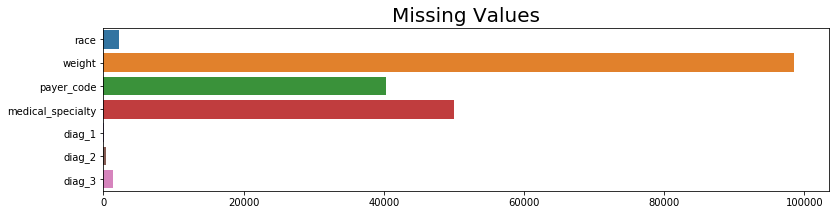

In [12]:
fig, ax = plt.subplots(figsize=(13, 3))

sns.barplot(x=df.isnull().sum()[df.isnull().sum()>0],
            y=df.columns[df.isna().any()].tolist(),
            orient='h')

plt.title('Missing Values', size=20);

# Exploratory Analysis

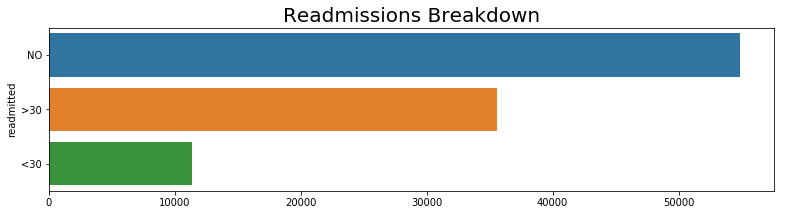

In [13]:
fig, ax = plt.subplots(figsize=(13, 3))

sns.countplot(y='readmitted', data=df)
plt.title('Readmissions Breakdown', size=20)
plt.xlabel('');

## Categorical Features vs. Readmission (Non-Drugs)

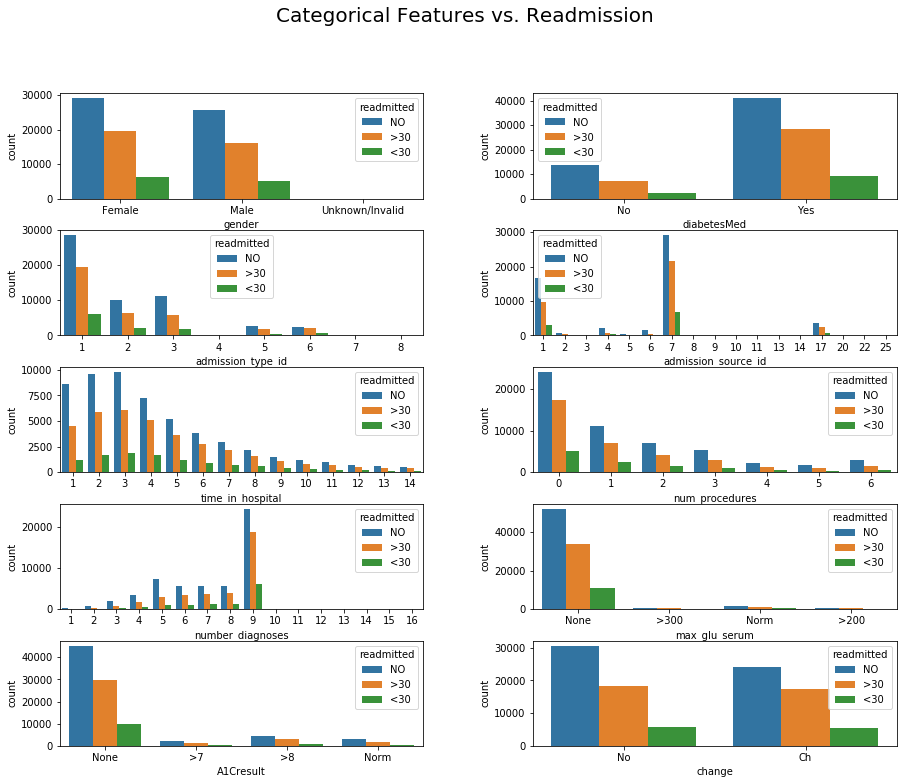

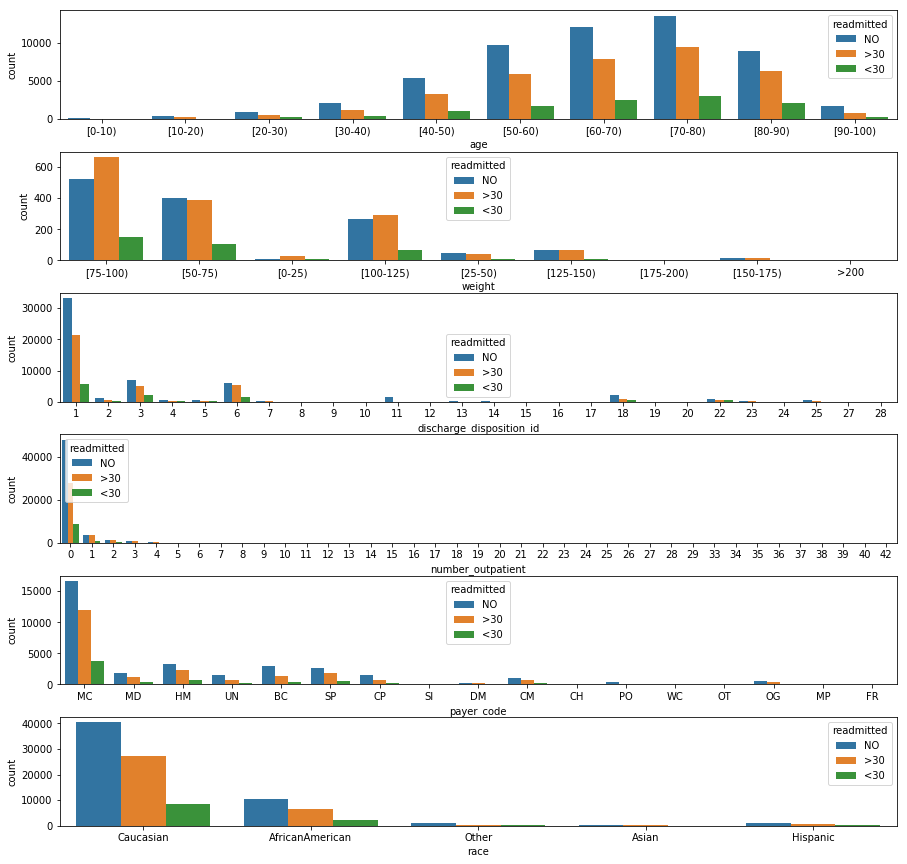

In [15]:
hue = df['readmitted']

# top 10 rows
fig, ((ax1, ax2),
      (ax3, ax4),
      (ax5, ax6),
      (ax7, ax8),
      (ax9, ax10)) = plt.subplots(5, 2, figsize=(15,12))


fig.subplots_adjust(hspace=0.3, wspace=0.3)
fig.suptitle('Categorical Features vs. Readmission', size=20)


sns.countplot(x=df['gender'], hue=hue, ax=ax1)
sns.countplot(x=df['diabetesMed'], hue=hue, ax=ax2)
sns.countplot(x=df['admission_type_id'], hue=hue, ax=ax3)
sns.countplot(x=df['admission_source_id'], hue=hue, ax=ax4)
sns.countplot(x=df['time_in_hospital'], hue=hue, ax=ax5)
# sns.countplot(x=df['num_lab_procedures'], hue=hue, ax=ax10)
# sns.countplot(x=df['medical_specialty'], hue=hue, ax=ax11)
sns.countplot(x=df['num_procedures'], hue=hue, ax=ax6)
# sns.countplot(x=df['num_medications'], hue=hue, ax=ax11)
# sns.countplot(x=df['diag_1'], hue=hue, ax=ax12)
# sns.countplot(x=df['diag_2'], hue=hue, ax=ax12)
# sns.countplot(x=df['diag_3'], hue=hue, ax=ax12)
sns.countplot(x=df['number_diagnoses'], hue=hue, ax=ax7)
sns.countplot(x=df['max_glu_serum'], hue=hue, ax=ax8)
sns.countplot(x=df['A1Cresult'], hue=hue, ax=ax9)
sns.countplot(x=df['change'], hue=hue, ax=ax10)


# plt.tight_layout()


# bottom 6 rows
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(15, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

sns.countplot(x=df['age'], hue=hue, ax=ax1)
sns.countplot(x=df['weight'], hue=hue, ax=ax2)
sns.countplot(x=df['discharge_disposition_id'], hue=hue, ax=ax3)
sns.countplot(x=df['number_outpatient'], hue=hue, ax=ax4)
sns.countplot(x=df['payer_code'], hue=hue, ax=ax5)
sns.countplot(x=df['race'], hue=hue, ax=ax6)

In [103]:
no_drug_df = df[['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
                 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                 'time_in_hospital', 'payer_code', 'medical_specialty',
                 'num_lab_procedures', 'num_procedures', 'num_medications',
                 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
                 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 
                 'readmitted', 'change', 'diabetesMed']]

drug_df = df[['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
              'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
              'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
              'tolazamide', 'examide', 'citoglipton', 'insulin',
              'glyburide-metformin', 'glipizide-metformin',
              'glimepiride-pioglitazone', 'metformin-rosiglitazone','metformin-pioglitazone', 'readmitted']]

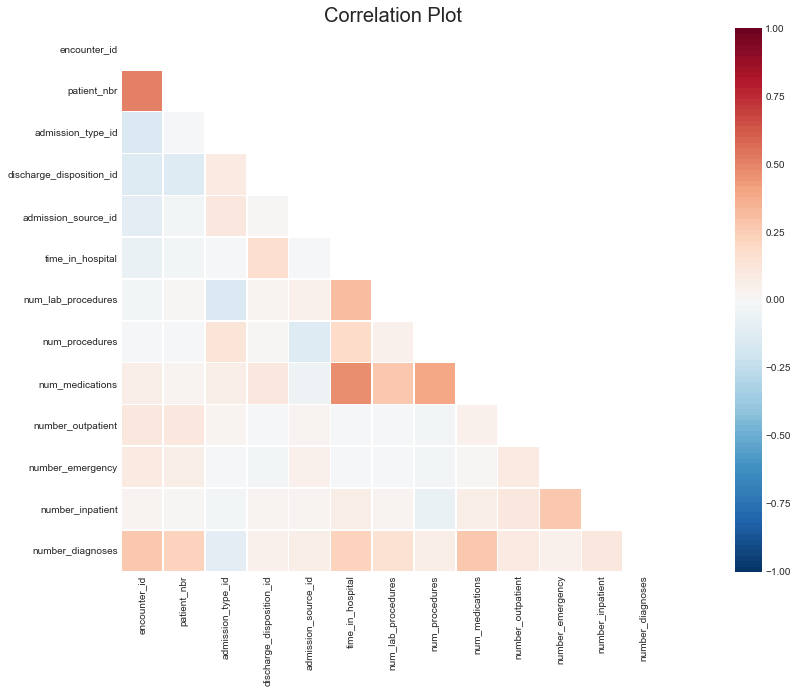

In [107]:
def corr_plot(df, title='Correlation Plot', figsize=(25, 10), max_cols=20):
    """
    Prints correlation plot. If number of columns > max_cols then annotations are turned off. 
    """
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=figsize)
    mask = np.zeros_like(df.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # if too many columns, plot gets messy because of in - box annotations
    if len(df.columns)>max_cols:
        annot = False
    else:
        annot = True   
    
    sns.heatmap(df.corr(),
                annot=annot,
                vmin=-1, vmax=1,
                square=True, 
                cmap=sns.color_palette('RdBu_r', 100),
                mask=mask,
                linewidths=0.5)
    # title
    plt.title(title, size=20)

corr_plot(df)